In [11]:
import numpy as np
from math import *
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch

def hcs_read_raw(filename):
    # RAW LINEAR OUT: UINT32 magic='HCSR', UINT8 dim, UINT16 level, UINT32 bytes_per_element, UINT64 N, N * bytes_per_element values
    f = open(filename, "rb") 
    fheader = np.fromfile(f, dtype=np.dtype([('magic', 'u4'), ('dim', 'u1'), ('level', 'u2'), ('bpe', 'u4'),  ('n', 'u8')]), count=1)
    # Assuming double as data_t 
    elements = int(fheader["bpe"][0] / 8)
    shape = [2**int(fheader["level"])]*int(fheader["dim"]) + [int(elements)]
    data = np.fromfile(f, dtype=np.dtype(str(elements) + 'f8'))
    data = data.reshape(shape)
    f.close()
    return data


In [20]:
data=hcs_read_raw("test9.raw")
#data = -data

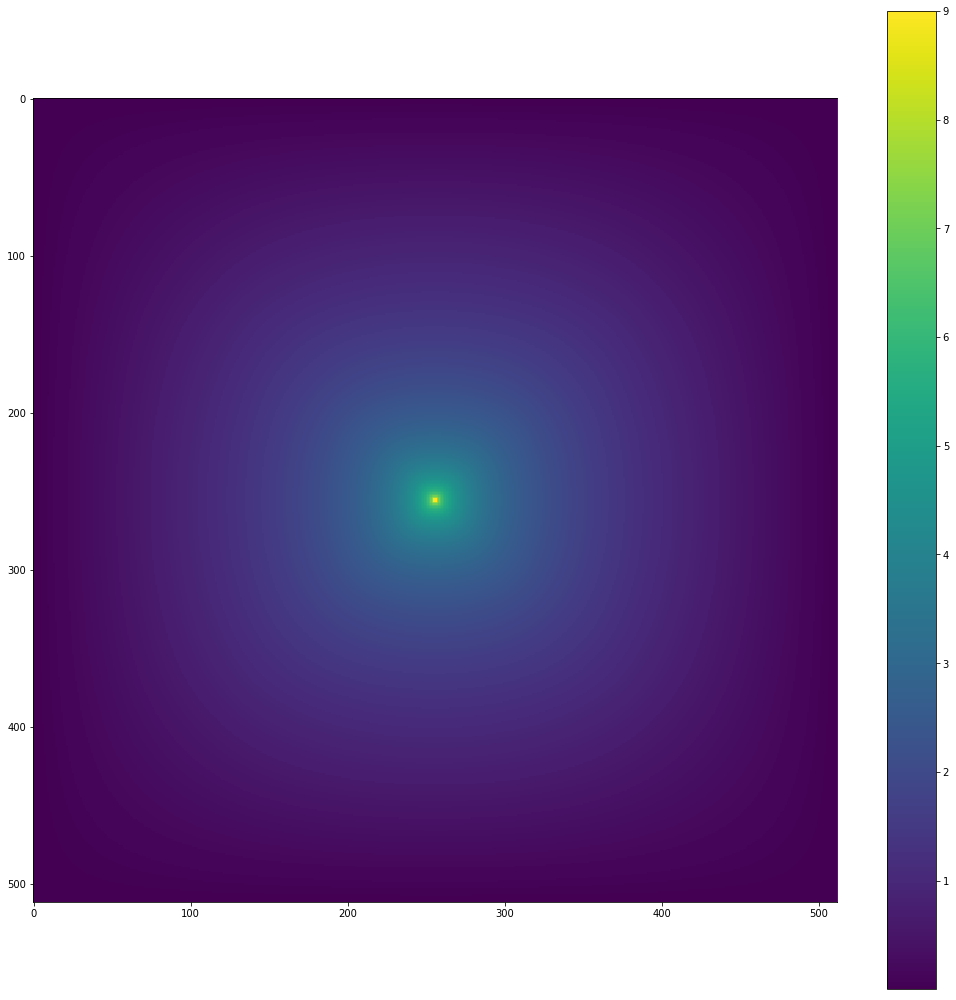

In [21]:
fig, ax = plt.subplots(figsize=(18, 18))
cax=ax.imshow(np.power(data.squeeze()[:,:],1), interpolation='nearest')
fig.colorbar(cax)

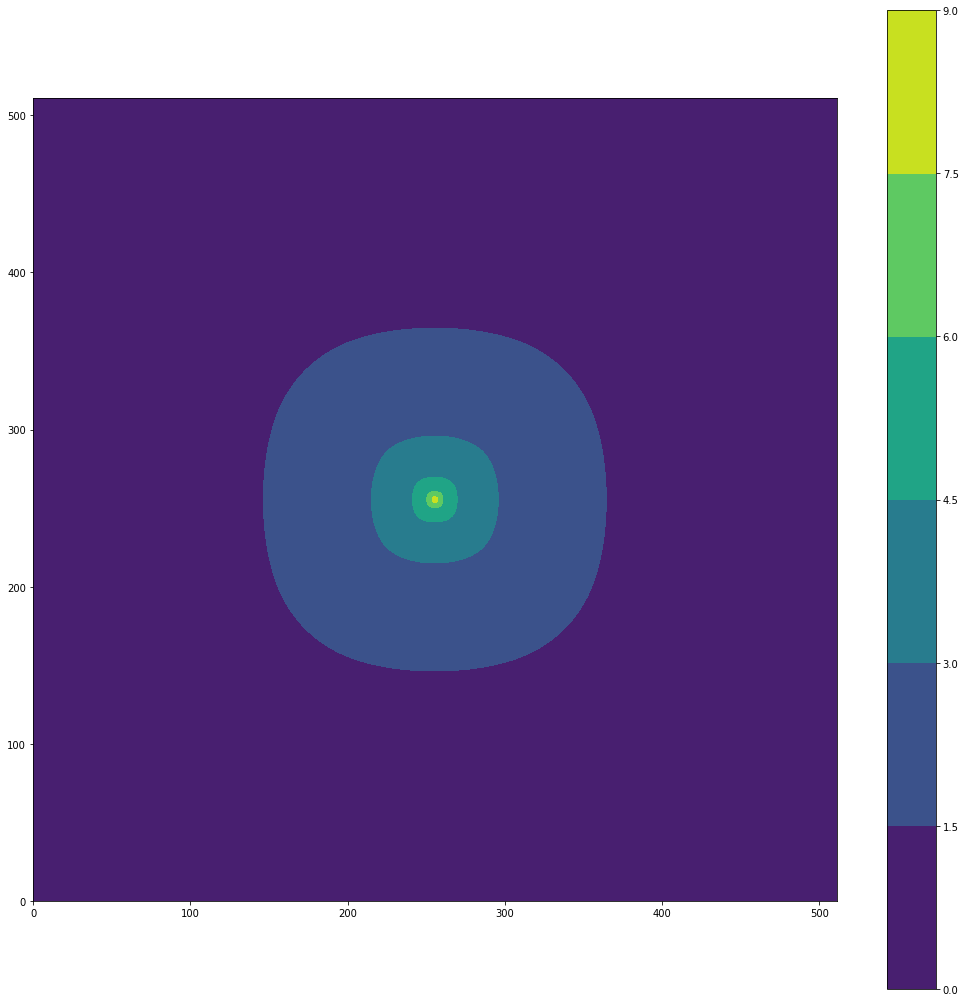

In [22]:
fig, ax = plt.subplots(figsize=(18, 18))
ax.set_aspect("equal")
cax=ax.contourf(np.power(data.squeeze(),1))
fig.colorbar(cax)


[]

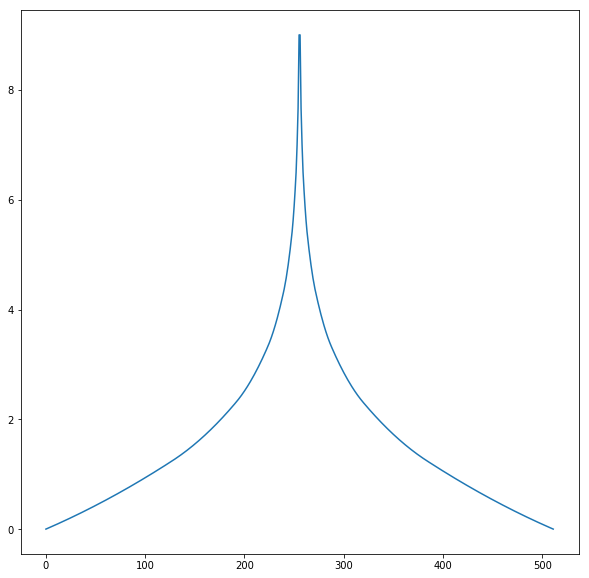

In [23]:
data.squeeze().max()
fig, ax = plt.subplots(figsize=(10, 10))
#ax.set_aspect("equal")
ax.plot(data.squeeze()[:,255])
ax.plot()